In [5]:
import pandas as pd

In [6]:
bible = pd.read_csv("t_asv.csv")

In [7]:
bible.isnull().sum()

id    0
b     0
c     0
v     0
t     0
dtype: int64

In [8]:
import os 
from google.colab import drive


drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DS 4001')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/DS 4001


# Putting each book into its own row

In [9]:
# Separate Bible into Old and New Testaments (The first book of the New Testament is Matthew which is book 40)
old_testament = bible[bible["b"] <= 39]
old_testament.to_csv("old_testament.csv")

new_testament = bible[bible["b"] > 39]
new_testament.to_csv("new_testament.csv")

In [10]:
books = [0, "Genesis", "Exodus", "Leviticus", "Numbers", "Deuteronomy", "Joshua",
         "Judges", "Ruth", "1 Samuel", "2 Samuel", "1 Kings", "2 Kings", 
         "1 Chronicles", "2 Chronicles", "Ezra", "Nehmiah", "Ester", "Job",
         "Psalms", "Proverbs", "Ecclesiastes", "Song of Songs", "Isaiah",
         "Jeremiah", "Lamentations", "Ezekial", "Daniel", "Hosea", "Joel",
         "Amos", "Obadiah", "Jonah", "Micah", "Nahum", "Habakkuk", "Zephaniah",
         "Haggai", "Zechariah", "Malachi", "Matthew", "Mark", "Luke", "John",
         "Acts", "Romans", "1 Corinthians", "2 Corinthians", "Galatians", "Ephesians",
         "Philippians", "Colossians", "1 Thessalonians", "2 Thessalonians",
         "1 Timothy", "2 Timothy", "Titus", "Philemon", "Hebrews", "James",
         "1 Peter", "2 Peter", "1 John", "2 John", "3 John", "Jude", "Revelation"] 

In [11]:
bookshelf = []

for i in range(1, len(books)):
  single = bible[bible["b"] == i]
  book = pd.DataFrame(single)
  bookshelf.append(book)

pages = []

for book in bookshelf:
  pages.append(" ".join(book["t"]))

separate = pd.DataFrame(pages)
separate.columns = ["books"]

separate

,books
0,In the beginning God created the heavens and t...
1,"Now these are the names of the sons of Israel,..."
2,"And Jehovah called unto Moses, and spake unto ..."
3,And Jehovah spake unto Moses in the wilderness...
4,These are the words which Moses spake unto all...
...,...
61,"That which was from the beginning, that which ..."
62,The elder unto the elect lady and her children...
63,"The elder unto Gaius the beloved, whom I love ..."
64,"Jude, a servant of Jesus Christ, and brother o..."


# Cleaning the text of each book

In [12]:
# Import packages we need to clean the verses
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Stop Words for Middle English from
# https://github.com/cltk/cltk/blob/master/cltk/stop/middle_english/stops.py
# Added 'unto', 'shall', 'hath', 'shalt'

middle_english_stops = ['ac',
			  'afore',
			  'ake',
			  'an',
			  'because',
			  'ek',
			  'fore',
			  'for',
			  'forthi',
			  'whan',
			  'whanne',
			  'whilis',
			  'if',
			  'yf',
			  'yif',
			  'yiff',
			  'yit',
			  'yet',
			  'and',
			  'or',
			  'any',
			  'but',
			  'a',
			  'y', 
			  'ne',
			  'no',
			  'not',
			  'nor',
			  'nat',
			  'however',
			  'o',
			  'than',
			  'n',
			  'nn',
			  'nnn',
			  'to',
			  'with',
			  'wyth',
			  'at',
			  'as',
			  'of',
			  'off',
			  'from',
			  'on',
			  'before',
			  'by',
			  'after',
			  'about',
			  'above',
			  'across',
			  'among',
			  'against',
			  'below',
			  'between',
			  'during',
			  'into',
			  'in',
			  'out',
			  'over',
			  'under',
			  'abord',
			  'aboven',
			  'afore',
			  'aftir',
			  'bi',
			  'bifor',
			  'bisyde',
			  'bitwixten',
			  'byfore',
			  'bytwene',
			  'down',
			  'doun',
			  'embe',
			  'fra',
			  'ine',
			  'mid',
			  'sanz',
			  'tyll',
			  'umbe',
			  'vnto',
			  'vpon',
			  'withouten',
			  'with',
			  'wth',
			  'wtout',
			  'can',
			  'cannot',
			  "can't",
			  't',
			  'could',
			  'did',
			  'do',
			  'does',
			  'wyl',
			  'will',
			  'would',
			  'haven',
			  'hast',
			  'haþ',
			  'havende',
			  'hadde',
			  'haddest',
			  'hadden',
			  'had',
			  "hadn't",
			  'has',
			  "hasn't",
			  'hasn',
			  'have',
			  "haven't",
			  'haven',
			  'having',
			  'be',
			  'ben',
			  'been',
			  'am',
			  'art',
			  'is',
			  'ys',
			  'aren',
			  'are',
			  "aren't",
			  'bende',
			  "isn't",
			  'isn',
			  'wæs',
			  'was', 
			  "wasn't",
			  'wasn',
			  'weren',
			  'were',
			  "weren't",
			  'þe',
			  'the',
			  'þat',
			  'þenne',
			  'þis',
			  'whiche',
			  'which',
			  'while',
			  'who',
			  'whom',
			  'what',
			  'when',
			  'where',
			  'why',
			  'that',
			  "that's",
			  's',
			  'there',
			  'ther',
			  'þer',
			  "there's",
			  'these',
			  'this',
			  'those',
			  'boþe',
			  'thilke',
			  'eiþer',
			  'either',
			  'neither',
			  'al',
			  'all',
			  'also',
			  'ane',
			  'ic',
			  'ich',
			  'i',
			  "i'd",
			  'd',
			  "i'll",
			  'll',
			  "i'm",
			  'm',
			  "i've",
			  've',
			  'me',
			  'mi',
			  'my',
			  'minen',
			  'min',
			  'mire',
			  'minre',
			  'myself',
			  'þu',
			  'þou',
			  'tu',
			  'þeou',
			  'thi',
			  'you',
			  'þe',
			  'þi',
			  'ti',
			  'þin',
			  'þyn',
			  'þeself',
			  "you'd",
			  "you'll",
			  "you're",
			  're',
			  "you've",
			  'your',
			  'yours',
			  'yourself',
			  'yourselves',
			  'thee',
			  'thy',
			  'thou',
			  'ye',
			  'thine',
			  'he',
			  "he'd",
			  "he'll",
			  "he's",
			  'she',
			  'sche',
			  "she'd",
			  "she'll",
			  "she's",
			  'her',
			  'heo',
			  'hie',
			  'hies',
			  'hire',
			  'hir',
			  'hers',
			  'hio',
			  'heore',
			  'herself',
			  'him',
			  'hine',
			  'hisse',
			  'hes',
			  'himself',
			  'his',
			  'hys',
			  'hym',
			  'hit',
			  'yt',
			  'it',
			  'its',
			  "it's",
			  'tis',
			  'twas',
			  'itself',
			  'þay',
			  'youre',
			  'hyr',
			  'hem',
			  'we',
			  "we'd",
			  "we'll",
			  "we're",
			  "we've",
			  'us',
			  'ous',
			  'our',
			  'ure',
			  'ures',
			  'urne',
			  'ours',
			  'oures',
			  'ourselves',
			  'their',
			  'theirs',
			  'them',
			  'themselves',
			  'thai',
			  'thei',
			  'they',
			  "they'd",
			  "they'll",
			  "they're",
			  "they've",
			  'whan',
        'unto',
        'shall',
        'hath',
        'shalt'
        ]

In [14]:
# Stop words
stop_words = stopwords.words('english') + middle_english_stops

# Helper Functions

def stopwords_deleter(text, container):
  '''
  Takes in a list of sentences and then goes and 
  gets rid of all the stop words and puts them in the list
  '''

  for sentence in text:
    tokens = word_tokenize(sentence)
    desc = []
    for i in range(len(tokens)):
      if tokens[i].lower() not in stop_words:
        desc.append(tokens[i])
        if i == len(tokens) - 1:
          container.append(" ".join(desc))
  return container

def clean_string(s):
  '''
  Gets rid of punctuation in the sentences
  '''

  return s.translate(str.maketrans('', '', string.punctuation))



In [15]:
# Will hold list of verses from old and new testaments respectively
goLDA = []


# Gets rid of stop words in the verses
stopwords_deleter(pages, goLDA)


["beginning God created heavens earth . earth waste void ; darkness upon face deep : Spirit God moved upon face waters . God said , Let light : light . God saw light , good : God divided light darkness . God called light Day , darkness called Night . evening morning , one day . God said , Let firmament midst waters , let divide waters waters . God made firmament , divided waters firmament waters firmament : . God called firmament Heaven . evening morning , second day . God said , Let waters heavens gathered together one place , let dry land appear : . God called dry land Earth ; gathering together waters called Seas : God saw good . God said , Let earth put forth grass , herbs yielding seed , `and ' fruit-trees bearing fruit kind , wherein seed thereof , upon earth : . earth brought forth grass , herbs yielding seed kind , trees bearing fruit , wherein seed thereof , kind : God saw good . evening morning , third day . God said , Let lights firmament heaven divide day night ; let signs 

In [16]:
# Gets rid of punctuation from each verse
#for i in range(len(goLDA)):
  #goLDA[i] = clean_string(goLDA[i])

#Getting rid of punctuation makes our LDA worse

In [17]:
# Convert cleaned old testament to Dataframe
cleaned_books = pd.DataFrame(goLDA)
cleaned_books.columns = ["book"]
cleaned_books

,book
0,beginning God created heavens earth . earth wa...
1,"names sons Israel , came Egypt ( every man hou..."
2,"Jehovah called Moses , spake tent meeting , sa..."
3,"Jehovah spake Moses wilderness Sinai , tent me..."
4,words Moses spake Israel beyond Jordan wildern...
...,...
61,"beginning , heard , seen eyes , beheld , hands..."
62,"elder elect lady children , love truth ; , kno..."
63,"elder Gaius beloved , love truth . Beloved , p..."
64,"Jude , servant Jesus Christ , brother James , ..."


In [18]:
# Export Cleaned Testaments
#cleaned_old_testament.to_csv("cleaned_old_testament.csv")
#cleaned_new_testament.to_csv("cleaned_new_testament.csv")
cleaned_books.to_csv("cleaned_books.csv")

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Checks most frequent words
cvec = CountVectorizer(stop_words="english").fit(goLDA)
counts = cvec.transform(goLDA)
sum = counts.sum(axis=0)

freq = []

for word, i in cvec.vocabulary_.items():
  freq.append((word, sum[0, i]))
freq = sorted(freq, key = lambda x: x[1], reverse=True)

freq[:10]

[('jehovah', 6888),
 ('god', 4112),
 ('said', 3910),
 ('man', 2670),
 ('israel', 2582),
 ('king', 2551),
 ('son', 2382),
 ('came', 2084),
 ('house', 1981),
 ('come', 1904)]

# Latent Dirichlet Allocation

**Big Idea:**

Each document can be described by a distribution of topics and each topic can be described by a distribution of words.

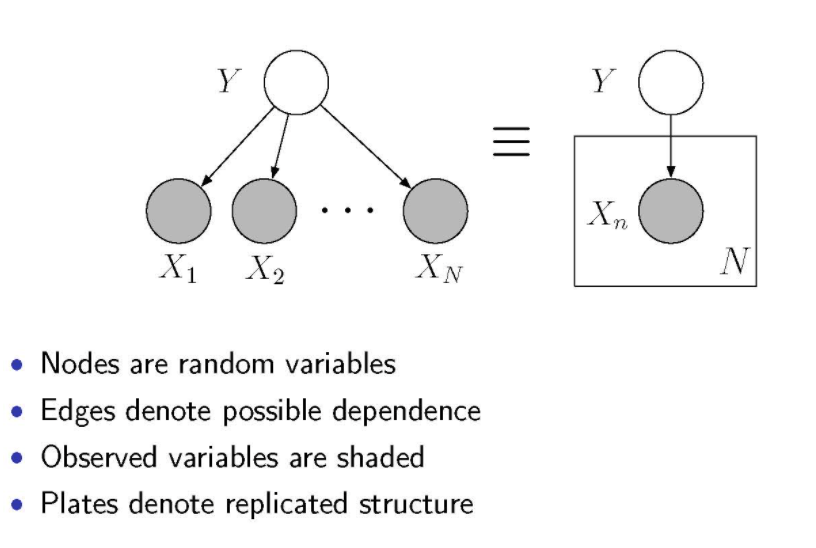

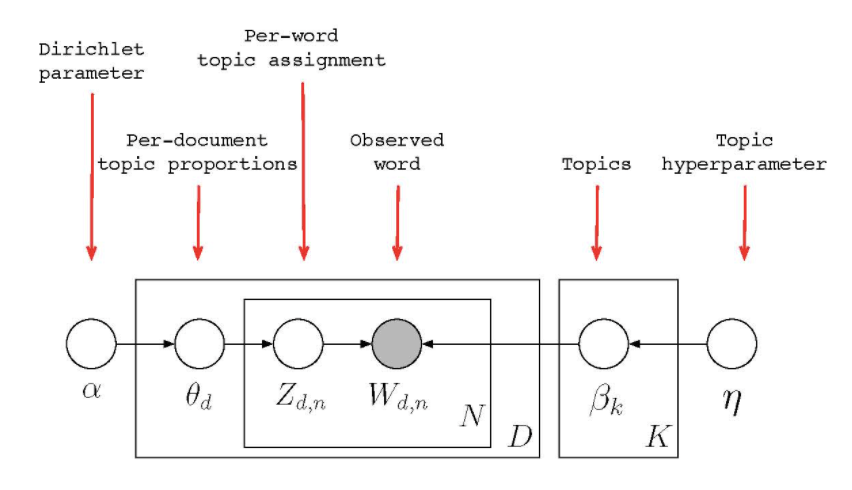

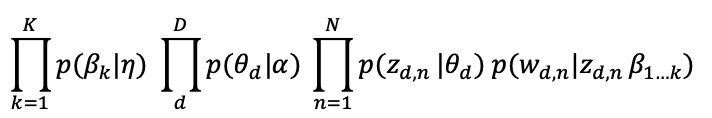

What is the joint distribution of all the hidden and observed variables in this model? 

First, we have each topic coming from the Dirichlet Distribution. 

Now we have the documents and the first random variable we generate for each document is the topic proportions, which depend on alpha. This is also drawn from a Dirichlet Distribution.


Within each document, we have the words of the document. We first draw the topic assignment from the topic proportions. 

Finally,  we draw the word conditioned on documents and the topic.

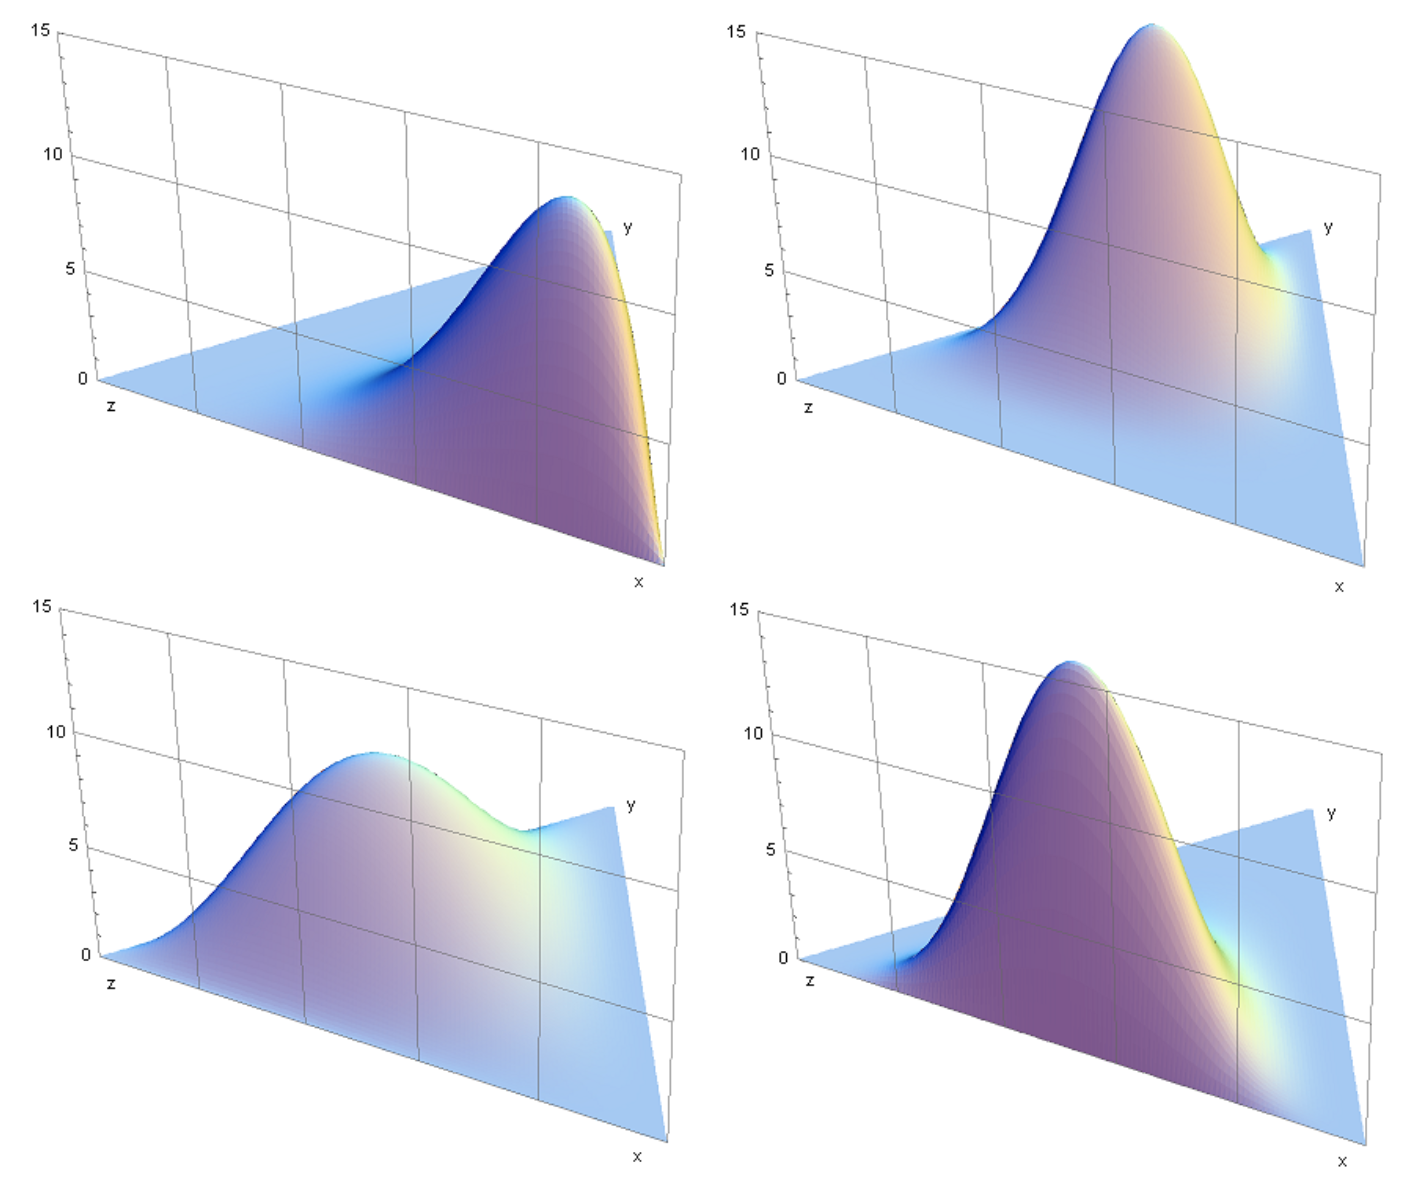


In [20]:
# Index column to keep track of indices
ind = [i for i in range(66)]
ind = pd.DataFrame(ind)

In [21]:
#Concat cleaned_books with index column
with_ind = pd.concat([cleaned_books, ind], axis=1)
with_ind.columns = ["book", "index"]
with_ind

,book,index
0,beginning God created heavens earth . earth wa...,0
1,"names sons Israel , came Egypt ( every man hou...",1
2,"Jehovah called Moses , spake tent meeting , sa...",2
3,"Jehovah spake Moses wilderness Sinai , tent me...",3
4,words Moses spake Israel beyond Jordan wildern...,4
...,...,...
61,"beginning , heard , seen eyes , beheld , hands...",61
62,"elder elect lady children , love truth ; , kno...",62
63,"elder Gaius beloved , love truth . Beloved , p...",63
64,"Jude , servant Jesus Christ , brother James , ...",64


In [22]:
#Split old testament and new testament

old_test = with_ind[with_ind["index"] < 39]
new_test = with_ind[with_ind["index"] >= 39]

old_test = old_test.drop("index", axis=1)
new_test = new_test.drop("index", axis=1)

In [23]:
# Reset Indices of Old Testament
to_drop_ind = new_test.reset_index()
to_drop_ind.drop("index",axis=1)

,book
0,"book generation Jesus Christ , son David , son..."
1,"beginning gospel Jesus Christ , Son God . Even..."
2,Forasmuch many taken hand draw narrative conce...
3,"beginning Word , Word God , Word God . beginni..."
4,"former treatise made , Theophilus , concerning..."
5,"Paul , servant Jesus Christ , called `to ' apo..."
6,"Paul , called `to ' apostle Jesus Christ God ,..."
7,"Paul , apostle Christ Jesus God , Timothy brot..."
8,"Paul , apostle ( men , man , Jesus Christ , Go..."
9,"Paul , apostle Christ Jesus God , saints Ephes..."


In [24]:
old_test

,book
0,beginning God created heavens earth . earth wa...
1,"names sons Israel , came Egypt ( every man hou..."
2,"Jehovah called Moses , spake tent meeting , sa..."
3,"Jehovah spake Moses wilderness Sinai , tent me..."
4,words Moses spake Israel beyond Jordan wildern...
5,"came pass death Moses servant Jehovah , Jehova..."
6,"came pass death Joshua , children Israel asked..."
7,"came pass days judges judged , famine land . c..."
8,"certain man Ramathaim-zophim , hill-country Ep..."
9,"came pass death Saul , David returned slaughte..."


In [25]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


def run_LDA(text, num_topics=5, num_words=10):
  '''
  Performs Latent Dirichlet Allocation and outputs the topics and the top n words
  associated with that topic, the distribution of document topics, and
  the perplexity. 
  '''

  # Actually does LDA
  lda = LDA(n_components=num_topics, n_jobs=-1, random_state=42)
  countvected = CountVectorizer(stop_words="english")
  data_wordc = countvected.fit_transform(text)
  lda.fit(data_wordc)
  distrib_of_doc_topics = lda.transform(data_wordc)

  
  # Will hold topics and the words associated with it
  topics_and_makeup = {}

  vocab = countvected.get_feature_names()

  # Puts the topics and makeup in the dictionary
  for topic, comp in enumerate(lda.components_):   
      makeup = np.argsort(comp)[::-1][:num_words]
      topics_and_makeup[topic] = [vocab[i] for i in makeup]

  return topics_and_makeup, distrib_of_doc_topics, lda.bound_

In [26]:
# Old Testament Topics
old_object = run_LDA(old_test['book'], 19, 15)
old_object

({0: ['said',
   'naomi',
   'boaz',
   'law',
   'jehovah',
   'came',
   'kinsman',
   'went',
   'mother',
   'daughter',
   'ruth',
   'let',
   'people',
   'man',
   'begat'],
  1: ['drinkers',
   'breathing',
   'scouring',
   'pursuer',
   'approveth',
   'comparable',
   'pitiful',
   'recall',
   'respected',
   'harts',
   'sighs',
   'blacker',
   'polishing',
   'sated',
   'abject'],
  2: ['said',
   'jehovah',
   'god',
   'land',
   'israel',
   'children',
   'came',
   'went',
   'man',
   'son',
   'father',
   'men',
   'hand',
   'day',
   'house'],
  3: ['jonah',
   'said',
   'sea',
   'nineveh',
   'city',
   'god',
   'cast',
   'jehovah',
   'evil',
   'gourd',
   'great',
   'ship',
   'fish',
   'tarshish',
   'prepared'],
  4: ['day',
   'esau',
   'mount',
   'possess',
   'calamity',
   'cut',
   'substance',
   'deceived',
   'jacob',
   'captives',
   'distress',
   'south',
   'understanding',
   'brother',
   'shall'],
  5: ['king',
   'jehovah',
   '

In [27]:
# New Testament Topic 
new_object = run_LDA(new_test['book'], 8, 15)
new_object

({0: ['god',
   'christ',
   'law',
   'man',
   'things',
   'lord',
   'spirit',
   'let',
   'jesus',
   'faith',
   'body',
   'flesh',
   'sin',
   'say',
   'men'],
  1: ['deceiver',
   'lose',
   'paper',
   'onward',
   'knowest',
   'walkest',
   'gaius',
   'prosper',
   'health',
   'demetrius',
   'prospereth',
   'unwilling',
   'pen',
   'diotrephes',
   'welcome'],
  2: ['god',
   'christ',
   'lord',
   'things',
   'jesus',
   'love',
   'faith',
   'man',
   'know',
   'glory',
   'spirit',
   'brethren',
   'let',
   'grace',
   'father'],
  3: ['said',
   'son',
   'god',
   'lord',
   'pass',
   'came',
   'things',
   'saying',
   'house',
   'certain',
   'people',
   'man',
   'day',
   'say',
   'days'],
  4: ['said',
   'jesus',
   'man',
   'say',
   'came',
   'come',
   'saying',
   'things',
   'father',
   'saith',
   'god',
   'son',
   'went',
   'disciples',
   'lord'],
  5: ['god',
   'great',
   'earth',
   'seven',
   'saw',
   'heaven',
   'come',


In [28]:
total = run_LDA(cleaned_books["book"], 17, 15)
total

({0: ['jehovah',
   'offering',
   'priest',
   'unclean',
   'holy',
   'blood',
   'thereof',
   'moses',
   'sin',
   'altar',
   'burnt',
   'make',
   'man',
   'offer',
   'land'],
  1: ['god',
   'paul',
   'great',
   'lord',
   'things',
   'earth',
   'come',
   'saying',
   'men',
   'saw',
   'came',
   'heaven',
   'heard',
   'spirit',
   'voice'],
  2: ['welcome',
   'forbiddeth',
   'demetrius',
   'unwilling',
   'diotrephes',
   'stamped',
   'repay',
   'pen',
   'occupation',
   'silvanus',
   'aged',
   'disaster',
   'saviours',
   'zarephath',
   'crossway'],
  3: ['said',
   'david',
   'jehovah',
   'son',
   'came',
   'sons',
   'god',
   'israel',
   'men',
   'saul',
   'went',
   'father',
   'man',
   'hand',
   'king'],
  4: ['king',
   'jehovah',
   'said',
   'israel',
   'house',
   'son',
   'came',
   'judah',
   'solomon',
   'god',
   'went',
   'people',
   'man',
   'saying',
   'david'],
  5: ['children',
   'jehovah',
   'israel',
   'moses',


In [29]:
gamma_matrix1 = pd.DataFrame(old_object[1])
gamma_matrix1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000004,0.000004,0.999934,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
1,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.999920,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
2,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.999887,0.000006,0.000006,0.000006,0.000006,0.000006
3,0.000004,0.000004,0.065014,0.000004,0.000004,0.000004,0.000619,0.000004,0.000004,0.917444,0.000004,0.000004,0.000004,0.016859,0.000004,0.000004,0.000004,0.000004,0.000004
4,0.000006,0.000006,0.364870,0.000006,0.000006,0.000006,0.307688,0.000006,0.000006,0.089813,0.000006,0.000006,0.000006,0.055330,0.000006,0.000006,0.000006,0.182222,0.000006
5,0.000007,0.000007,0.947370,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.052507,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
6,0.000007,0.000007,0.840780,0.000007,0.000007,0.023917,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.040364,0.094828,0.000007,0.000007
7,0.998957,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058
8,0.000006,0.000006,0.100517,0.000006,0.000006,0.000006,0.022232,0.000006,0.000006,0.001147,0.000006,0.000006,0.000006,0.000006,0.000006,0.025990,0.847457,0.002584,0.000006
9,0.000007,0.000007,0.010410,0.000007,0.000007,0.000007,0.023960,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.029269,0.929617,0.006653,0.000007


In [30]:
gamma_matrix2 = pd.DataFrame(new_object[1])
gamma_matrix2

,0,1,2,3,4,5,6,7
0,0.000015,0.000015,0.000015,0.000015,0.999897,0.000015,0.000015,0.000015
1,0.000024,0.000024,0.000024,0.000024,0.999831,0.000024,0.000024,0.000024
2,0.000014,0.000014,0.000014,0.356640,0.643276,0.000014,0.000014,0.000014
3,0.000020,0.000020,0.000020,0.000020,0.999862,0.000020,0.000020,0.000020
4,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0.999903
5,0.999735,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
6,0.999720,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040
7,0.000062,0.000062,0.999565,0.000062,0.000062,0.000062,0.000062,0.000062
8,0.505689,0.000116,0.186169,0.000116,0.000116,0.000116,0.000116,0.307561
9,0.000115,0.000115,0.999197,0.000115,0.000115,0.000115,0.000115,0.000115


In [31]:
gamma_matrix3 = pd.DataFrame(total[1])
gamma_matrix3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000004,0.000004,0.000004,0.917629,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.021800,0.000004,0.046635,0.013882,0.000004
1,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.999920,0.000005,0.000005,0.000005,0.000005,0.000005
2,0.999888,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
3,0.031372,0.000005,0.000005,0.012389,0.000005,0.876588,0.000005,0.000005,0.000005,0.000005,0.000005,0.003307,0.007828,0.000005,0.000005,0.002863,0.065606
4,0.038432,0.000006,0.000006,0.000006,0.000006,0.026487,0.000006,0.000006,0.000006,0.000006,0.000006,0.030210,0.000006,0.000006,0.000006,0.037427,0.867370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.998851,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072
62,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.433313,0.000588,0.000588,0.557864,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588
63,0.000499,0.000499,0.000499,0.000499,0.000499,0.000499,0.000499,0.162633,0.000499,0.000499,0.698245,0.000499,0.000499,0.000499,0.000499,0.000499,0.132143
64,0.000218,0.000218,0.000218,0.000218,0.000218,0.000218,0.000218,0.000218,0.139042,0.000218,0.537636,0.000218,0.043864,0.000218,0.227788,0.049056,0.000218


In [32]:
titles1 = ["Genesis", "Exodus", "Leviticus", "Numbers", "Deuteronomy", "Joshua",
         "Judges", "Ruth", "1 Samuel", "2 Samuel", "1 Kings", "2 Kings", 
         "1 Chronicles", "2 Chronicles", "Ezra", "Nehmiah", "Ester", "Job",
         "Psalms", "Proverbs", "Ecclesiastes", "Song of Songs", "Isaiah",
         "Jeremiah", "Lamentations", "Ezekial", "Daniel", "Hosea", "Joel",
         "Amos", "Obadiah", "Jonah", "Micah", "Nahum", "Habakkuk", "Zephaniah",
         "Haggai", "Zechariah", "Malachi"]

titles2 = ["Matthew", "Mark", "Luke", "John",
         "Acts", "Romans", "1 Corinthians", "2 Corinthians", "Galatians", "Ephesians",
         "Philippians", "Colossians", "1 Thessalonians", "2 Thessalonians",
         "1 Timothy", "2 Timothy", "Titus", "Philemon", "Hebrews", "James",
         "1 Peter", "2 Peter", "1 John", "2 John", "3 John", "Jude", "Revelation"] 

titles3 = titles1 + titles2

In [33]:
# the max value in each row and return the column number
def book_topic(gamma_matrix, titles):
  '''
  Takes in the gamma matrix and returns a Dataframe of the book and the
  corresponding topic.
  '''

  tobe_frame = []

  for i in range(len(gamma_matrix)):
    lst = [0,0]
    largest = 0 
    index = 0
    for j in range(len(gamma_matrix.iloc[0])):
      # Current Row
      val = gamma_matrix.iloc[i][j]

      # Most relevant topic number
      if val > largest:
        largest = val
        lst[1] = j
      
      if j == len(gamma_matrix.iloc[0]) - 1:
        lst[0] = titles[i] # doc id
        tobe_frame.append(lst)

  doc_topics = pd.DataFrame(tobe_frame)
  doc_topics.columns = ["book", "topic_number"]
  return doc_topics

In [34]:
old_topics = book_topic(gamma_matrix1, titles1)
old_topics

,book,topic_number
0,Genesis,2
1,Exodus,9
2,Leviticus,13
3,Numbers,9
4,Deuteronomy,2
5,Joshua,2
6,Judges,2
7,Ruth,0
8,1 Samuel,16
9,2 Samuel,16


In [35]:
new_topics = book_topic(gamma_matrix2, titles2)
new_topics

,book,topic_number
0,Matthew,4
1,Mark,4
2,Luke,4
3,John,4
4,Acts,7
5,Romans,0
6,1 Corinthians,0
7,2 Corinthians,2
8,Galatians,0
9,Ephesians,2


In [36]:
total_topics = book_topic(gamma_matrix3, titles3)
total_topics

,book,topic_number
0,Genesis,3
1,Exodus,11
2,Leviticus,0
3,Numbers,5
4,Deuteronomy,16
...,...,...
61,1 John,7
62,2 John,10
63,3 John,10
64,Jude,10


In [37]:
import plotly.express as px
temp = sorted(old_topics["topic_number"])
fig = px.histogram(x=temp, color=old_topics["topic_number"])
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



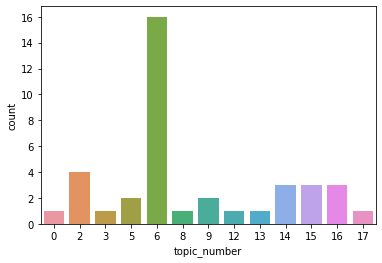

In [42]:
import seaborn as sns
sns.countplot(old_topics["topic_number"])

In [38]:
fig2 = px.histogram(x=new_topics["topic_number"], color=new_topics["topic_number"])
fig2.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



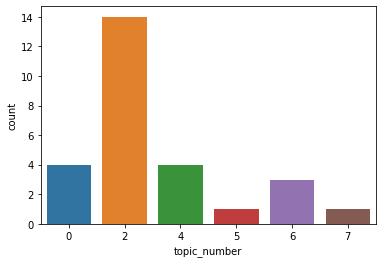

In [41]:
sns.countplot(new_topics["topic_number"])

In [43]:
fig = px.histogram(x=total_topics["topic_number"], color=total_topics["topic_number"])
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



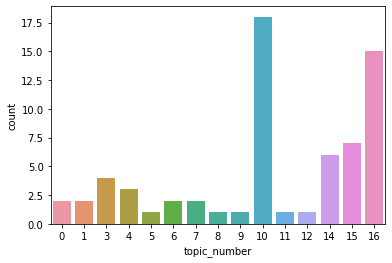

In [45]:
sns.countplot(total_topics["topic_number"])

# Evaluation

In [ ]:
answers_old = {0:"Ruth", 1:"Joshua", 2:"Exodus", 3:"Jonah", 4:"Genesis", 5:"Genesis",
              6:"general", 8:"Proverbs", 9:"Exodus", 12:"Esther", 13:"Exodus", 
              14:"1 Chronicles", 15:"Ecclesiastes", 16:"1 Samuel", 17:"Psalms"}
answers_old

In [ ]:
old_topics

In [ ]:
answers_new = {0:"Romans", 1:"3 John", 2:"James", 3: "Luke?", 4:"Matthew/Mark/Luke/John",
              5:"Revelation",6:"Titus", 7: "Acts"}
answers_new

In [ ]:
new_topics

The model looked like it did pretty good identifying what each book was about. It pretty much got a 100% on the New Testament, but since we didn't give it a lot of topics to get, it couldn't identify a specific topic from each book. We limited the number of topics to 8 because we found that if we added any more, there would be tons of duplicate topics for some reason. It labeled a bunch of books topic 2.

It did not do as well on the Old Testament, but it still did pretty good. From what we believe to be the right books for the topics, they didn't line up. Genesis was labeled as topic 2, while. we think it is either topic 4 or 5. It also labeled a bunch of books topic 6, which looked like to be general words that could appear anywhere.

Some notable things in this LDA model were that it classified Matthew, Mark, Luke, and John under the same topic and no other book got that topic. This is pretty cool since Matthew, Mark, Luke, and John essentially tell the same story. It also got Revelation and Acts too. For the Old Testament, it got the story of Jonah in a topic and Ruth. It also grouped 1 Samuel, 2 Samuel, and 1 Kings into a topic together. This is cool because those three books revolve around King David.